In [1]:
import numpy as np
N=32
xa = np.outer(np.ones(N),np.linspace(-1,1,N))
ya = xa.T

In [2]:
def M(T,e1,e2):
    return T/2*np.array([[1+e1,e2],[e2,1-e1]])

def frho(x0,y0, M):
    Mi = np.linalg.inv(M)
    dx = xa-x0
    dy = ya-y0
    rho = dx*Mi[0,0]*dx+dy*Mi[1,1]*dy+2*dx*Mi[0,1]*dy
    return np.exp(-rho)


In [3]:
def draw (A,x0,y0,T,e1,e2):
    return A*frho(x0,y0,M(T,e1,e2))

def adaptive_moments(img, iterations = 10):
    mx = 0.0
    my = 0.0
    M = np.array([[1.0,0],[0,1.0]])
    for i in range (iterations):
        f = frho(mx,my,M)
        fp = -f/2
        mx = (img*xa*fp).sum()/(img*fp).sum()
        my = (img*ya*fp).sum()/(img*fp).sum()
        A = (img*f).sum()/(f*f).sum()
        beta = 4
        N = (img*f).sum()
        dx = xa-mx
        dy = ya-my
        Mxx = beta*(img*dx*dx*f).sum()/N
        Myy = beta*(img*dy*dy*f).sum()/N
        Mxy = beta*(img*dx*dy*f).sum()/N
        M = np.array([[Mxx,Mxy],[Mxy,Myy]])
        print (mx,my, Mxx,Myy,Mxy)


Mt =  [[0.15 0.02]
 [0.02 0.05]]


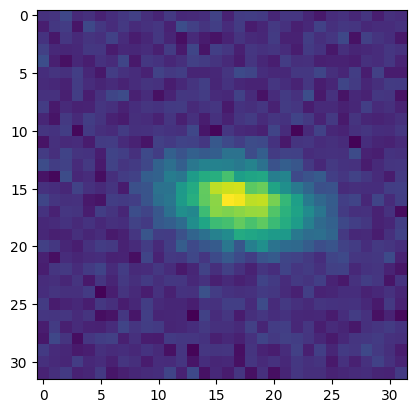

In [4]:
A=10.0
x0 = 0.1
y0 = 0.05
T = 0.2
e1 = 0.5
e2 =0.2
noise_level = 0.5
i = draw(A,x0,y0,T,e1,e2)+np.random.normal(0,noise_level,N*N).reshape(N,N)
print ("Mt = ",M(T,e1,e2))
plt.imshow(i)

In [5]:
#naive moments, biased
x0 = (xa*i).sum()/(i).sum()
y0 = (ya*i).sum()/(i).sum()
dx = xa-x0
dy = ya-y0

Mxx_naive = (i*dx*dx).sum()/(i).sum()
Myy_naive = (i*dy*dy).sum()/(i).sum()
Mxy_naive = (i*dx*dy).sum()/(i).sum()

print (x0,y0,Mxx_naive,Myy_naive,Mxy_naive)


0.10212398073201573 0.027672075967520117 0.07342849166717103 0.034016913510487384 0.024275338259426297


In [6]:
adaptive_moments(i)

0.09039974475217283 0.03885113705109633 0.2530373905494074 0.11126496251221869 0.05443432479955449
0.09935092677893377 0.04744178848897957 0.18883157469753895 0.06837371691262986 0.03224558708331271
0.10187556386948181 0.049196993501536466 0.16874483868498658 0.057416821455137323 0.026997942476727682
0.10286136769455805 0.04972829619667823 0.1605531840279696 0.053287853007217036 0.025088829243168038
0.1032900763100054 0.049902210343703776 0.1568787811153811 0.051497055469719416 0.024286075994635236
0.10348487137837768 0.049955138803787026 0.15516140489436592 0.05067255022447811 0.023928304270127883
0.10357512316373449 0.049966771440848746 0.15434332958429473 0.05028238780034929 0.02376492053111789
0.1036173249490657 0.04996565586796136 0.15395008941842964 0.050095320374531904 0.02368959906006016
0.10363715208305958 0.04996176576562773 0.15376022364368733 0.05000504331325386 0.023654791451493663
0.1036464936043152 0.049958201352470366 0.15366834739933366 0.049961329094105146 0.023638725